In [1]:
 # Dependencies

 from matplotlib import pyplot as plt
 from scipy import stats
 import matplotlib.pyplot as plt
 import numpy as np
 import pandas as pd
 import seaborn
 
 city_data = pd.read_csv("Instructions/Pyber/raw_data/city_data.csv")
 ride_data = pd.read_csv("Instructions/Pyber/raw_data/ride_data.csv")
 
    

In [2]:
city_data.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [3]:
ride_data.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


Average Fare ($) Per City

In [4]:
# ride_data.groupby(['city','fare']).count()
avg_city_fare = ride_data.groupby('city').mean()
avg_city_fare.head()



,fare,ride_id
city,,
Alvarezhaven,23.928710,5.351586e+12
Alyssaberg,20.609615,3.536678e+12
Anitamouth,37.315556,4.195870e+12
Antoniomouth,23.625000,5.086800e+12
Aprilchester,21.981579,4.574788e+12


Total Number of Rides Per City

In [5]:
Ttl_rides = ride_data['fare'].count()
Ttl_rides

2375

In [6]:
Rides_by_city = ride_data.groupby(['city']).count()
Rides_by_city.head()

,date,fare,ride_id
city,,,
Alvarezhaven,31,31,31
Alyssaberg,26,26,26
Anitamouth,9,9,9
Antoniomouth,22,22,22
Aprilchester,19,19,19


Total Drivers by city

In [7]:
Total_Drivers = city_data.groupby(['city']).sum()
Total_Drivers.head()

,driver_count
city,
Alvarezhaven,21
Alyssaberg,67
Anitamouth,16
Antoniomouth,21
Aprilchester,49


Pivot table of Ride_Data.CSV with Data Frame

In [8]:
grouping_ride = pd.DataFrame(ride_data.pivot_table(
           index = ["city"],
           values = ["fare", "ride_id"],
           aggfunc = {"fare": np.mean,
                    "ride_id":len},
           fill_value = 0))
grouping_ride.head()

,fare,ride_id
city,,
Alvarezhaven,23.928710,31
Alyssaberg,20.609615,26
Anitamouth,37.315556,9
Antoniomouth,23.625000,22
Aprilchester,21.981579,19


Pivot Table of City_Data without Data Frame

In [9]:
####NOT A DATAFRAME!

grouping_city = city_data.pivot_table(
           index = ["city", "type"],
           values = ["driver_count"],
           aggfunc = {"driver_count": np.mean,
                    },
           fill_value = 0)
grouping_city.head()

,,driver_count
city,type,
Alvarezhaven,Urban,21
Alyssaberg,Urban,67
Anitamouth,Suburban,16
Antoniomouth,Urban,21
Aprilchester,Urban,49


Pivot Table Merge

In [10]:
grouping_city.reset_index( inplace=True)
grouping_ride.reset_index( inplace=True)
Ride_Sharing = pd.merge(grouping_ride, grouping_city, 'left', on = ["city"])
Ride_Sharing.head()

,city,fare,ride_id,type,driver_count
0,Alvarezhaven,23.928710,31,Urban,21
1,Alyssaberg,20.609615,26,Urban,67
2,Anitamouth,37.315556,9,Suburban,16
3,Antoniomouth,23.625000,22,Urban,21
4,Aprilchester,21.981579,19,Urban,49


In [11]:
Urban_Plot = Ride_Sharing[Ride_Sharing['type']=='Urban']

Suburban_Plot = Ride_Sharing[Ride_Sharing['type']=='Suburban']

Rural_Plot = Ride_Sharing[Ride_Sharing['type']=='Rural']


Bubbles

In [12]:
labels = ["Rural", "Urban", "Suburban"]

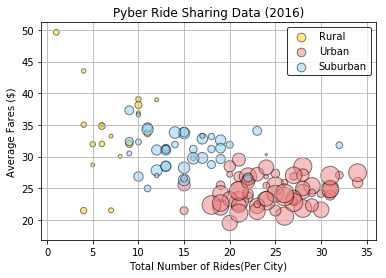

In [13]:
plt.scatter(Rural_Plot['ride_id'],Rural_Plot['fare'], s =Rural_Plot['driver_count']*5, edgecolor ='black', alpha = .5, c = '#FFD700')
plt.scatter(Urban_Plot['ride_id'],Urban_Plot['fare'], s =Urban_Plot['driver_count']*5, edgecolor ='black', alpha = .5, c = '#F08080')
plt.scatter(Suburban_Plot['ride_id'],Suburban_Plot['fare'], s =Suburban_Plot['driver_count']*5, edgecolor ='black', alpha = .5, c = '#87CEFA')
plt.title('Pyber Ride Sharing Data (2016)')
plt.ylabel("Average Fares ($)")
plt.xlabel('Total Number of Rides(Per City)')
lgnd = plt.legend(labels,frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
plt.grid()
plt.show()

Pie Charts

In [14]:
Merge_4Pies =city_data.merge(ride_data, on= 'city')
Merge_4Pies.head()


,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


Total Fares By City Type

In [15]:
FarebyType =Merge_4Pies.groupby('type')['fare'].sum()
FarebyType.index


Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

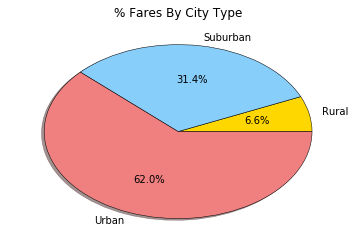

In [16]:
plt.pie(FarebyType, colors = ['#FFD700','#87CEFA','#F08080'],labels = FarebyType.index,autopct = "%1.1f%%",shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% Fares By City Type')
plt.show()

Total Rides By City Type

In [17]:
RidebyType=Merge_4Pies.groupby('type')['driver_count'].count()
RidebyType.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

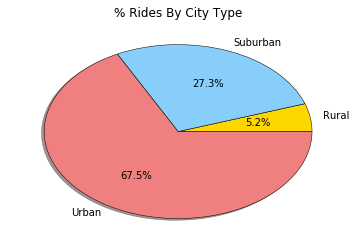

In [18]:
plt.pie(RidebyType, colors = ['#FFD700','#87CEFA','#F08080'],labels = RidebyType.index,autopct = "%1.1f%%",shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% Rides By City Type')
plt.show()

Total Drivers by City Type

In [19]:
DriversbyType =Merge_4Pies.groupby('type')['driver_count'].count()
DriversbyType.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

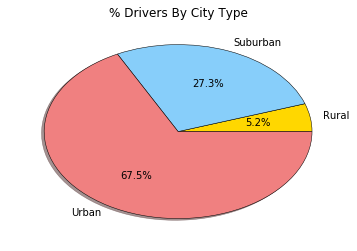

In [20]:
plt.pie(DriversbyType, colors = ['#FFD700','#87CEFA','#F08080'],labels = DriversbyType.index,autopct = "%1.1f%%",shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% Drivers By City Type')
plt.show()